In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans # Required for K-Means Clustering

In [2]:
#Reading the dataset
master = pd.read_excel("C:\\Users\saravanan\Documents\WorldBay\WorldBay-Dataset\Customer ID Subscription ID Invoice ID Relationship.xlsx")
grocedy = pd.read_excel("C:\\Users\saravanan\Documents\WorldBay\WorldBay-Dataset\Grocedy -Invoice.xlsx")
customer=pd.read_excel("C:\\Users\saravanan\Documents\WorldBay\WorldBay-Dataset\Customer_List_NEW2.xlsx")

In [3]:
#Getting only required columns from each dataset
master=master[['Subscription ID','Invoice ID','Customer ID','Invoice Date','Invoice Number','Invoice Status','Total (BCY)','Age Tier','Balance (BCY)','Expected Payment','Last Payment Date']]
grocedy=grocedy[['Invoice ID','Invoice Number','Invoice Date','Due Date','Expected Payment Date','Invoice Status','Customer ID','Subscription ID','Total','Balance','Item Name']]

In [29]:
#Merging master and grocedy datasets
grocedy_mas=pd.merge(master,grocedy,how='left',on=['Invoice ID','Customer ID'])

In [30]:
grocedy_mas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119300 entries, 0 to 119299
Data columns (total 20 columns):
Subscription ID_x        119300 non-null int64
Invoice ID               119300 non-null int64
Customer ID              119300 non-null int64
Invoice Date_x           119300 non-null datetime64[ns]
Invoice Number_x         119300 non-null object
Invoice Status_x         119300 non-null object
Total (BCY)              119300 non-null int64
Age Tier                 119300 non-null object
Balance (BCY)            119300 non-null int64
Expected Payment         0 non-null float64
Last Payment Date        15592 non-null datetime64[ns]
Invoice Number_y         49143 non-null object
Invoice Date_y           49143 non-null object
Due Date                 49143 non-null object
Expected Payment Date    0 non-null object
Invoice Status_y         49143 non-null object
Subscription ID_y        49143 non-null float64
Total                    49143 non-null float64
Balance                  491

In [21]:
grocedy_mas[grocedy_mas['Invoice Status_x']!='Void'].count()

Subscription ID_x        22217
Invoice ID               22217
Customer ID              22217
Invoice Date_x           22217
Invoice Number_x         22217
Invoice Status_x         22217
Total (BCY)              22217
Age Tier                 22217
Balance (BCY)            22217
Expected Payment             0
Last Payment Date        14749
Invoice Number_y         10210
Invoice Date_y           10210
Due Date                 10210
Expected Payment Date        0
Invoice Status_y         10210
Subscription ID_y        10210
Total                    10210
Balance                  10210
Item Name                10210
dtype: int64

In [127]:
#Since Void are not valid invoice omitting Void records
grocedy_mas=grocedy_mas[grocedy_mas['Invoice Status_x']!='Void']

In [128]:
grocedy_mas[grocedy_mas['Invoice Number_y'].notnull()]

,Subscription ID_x,Invoice ID,Customer ID,Invoice Date_x,Invoice Number_x,Invoice Status_x,Total (BCY),Age Tier,Balance (BCY),Expected Payment,Last Payment Date,Invoice Number_y,Invoice Date_y,Due Date,Expected Payment Date,Invoice Status_y,Subscription ID_y,Total,Balance,Item Name
29,143719000023984016,143719000036126475,143719000023984001,2021-08-28,INV-060776,Closed,9000,5. Above 180 days,0,NaN,2021-11-03,INV-060776,2021-08-28,2021-09-24,NaN,Closed,1.437190e+17,9000.0,0.0,Bronze Basket
30,143719000021368402,143719000036550495,143719000021368389,2021-09-07,INV-062477,Closed,15000,5. Above 180 days,0,NaN,2021-11-01,INV-062477,2021-09-07,2021-10-04,NaN,Closed,1.437190e+17,15000.0,0.0,Silver Basket
31,143719000026194245,143719000036645371,143719000026194232,2021-09-08,INV-062717,Closed,9000,5. Above 180 days,0,NaN,2021-11-08,INV-062717,2021-09-08,2021-10-05,NaN,Closed,1.437190e+17,9000.0,0.0,Bronze Basket
130,143719000030511684,143719000032330702,143719000030511671,2021-06-18,INV-048180,Closed,15000,5. Above 180 days,0,NaN,2021-11-04,INV-048180,2021-06-18,2021-07-15,NaN,Closed,1.437190e+17,15000.0,0.0,Silver Basket
131,143719000029986008,143719000033358007,143719000029984995,2021-07-08,INV-051764,Closed,26000,5. Above 180 days,0,NaN,2021-11-09,INV-051764,2021-07-08,2021-08-04,NaN,Closed,1.437190e+17,26000.0,0.0,Gold Basket
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118387,143719000026469478,143719000033615349,143719000026469465,2021-07-12,INV-052523,Closed,9000,5. Above 180 days,0,NaN,2022-08-08,INV-052523,2021-07-12,2021-08-08,NaN,Closed,1.437190e+17,9000.0,0.0,Bronze Basket
118780,143719000029325103,143719000029325114,143719000029324930,2021-04-28,INV-039455,Overdue,15000,5. Above 180 days,5500,NaN,2022-08-08,INV-039455,2021-04-28,2021-05-25,NaN,Overdue,1.437190e+17,15000.0,6500.0,Silver Basket
118794,143719000017147317,143719000030033478,143719000017147304,2021-05-12,INV-041807,Overdue,15000,5. Above 180 days,6000,NaN,2022-08-08,INV-041807,2021-05-12,2021-06-08,NaN,Overdue,1.437190e+17,15000.0,7000.0,Silver Basket
119134,143719000048347233,143719000048347244,143719000045785513,2022-04-14,INV-107575,Closed,15000,4. 91 - 180 days,0,NaN,2022-08-10,INV-107575,2022-04-14,2022-05-11,NaN,Overdue,1.437190e+17,15000.0,1500.0,Silver Basket


In [33]:
#Building a dataset at each customer level

#Populating number of invoices for a customer
inv=grocedy_mas.groupby('Customer ID')['Invoice ID'].count().to_frame().rename(columns={'Invoice ID':'No of Invoices'})

#Getting count of invoices under each age tier and pivoting the age tier as columns
age = grocedy_mas.groupby(['Customer ID','Age Tier'])['Invoice ID'].count().reset_index()
age = age.pivot(index='Customer ID', columns='Age Tier', values='Invoice ID')
inv_age=inv.merge(age,on='Customer ID')

#Getting count of invoices under each invice status and pivoting the invoice status as columns
inv_sta = grocedy_mas.groupby(['Customer ID','Invoice Status_x'])['Invoice ID'].count().reset_index()
inv_sta = inv_sta.pivot(index='Customer ID', columns='Invoice Status_x', values='Invoice ID')
inv_status=inv_age.merge(inv_sta,on='Customer ID')

#Total amount spent by each customer, slicing amount as sum,mean,median
inv_amt_sum=grocedy_mas.groupby(['Customer ID'])['Total (BCY)'].sum().reset_index().rename(columns={'Total (BCY)':'Total Amt'})
inv_amt_mean=grocedy_mas.groupby(['Customer ID'])['Total (BCY)'].mean().reset_index().rename(columns={'Total (BCY)':'Avg Amt'})
inv_amt_median=grocedy_mas.groupby(['Customer ID'])['Total (BCY)'].median().reset_index().rename(columns={'Total (BCY)':'Median Amt'})

#Merging amount datasets
inv_amt_a=inv_amt_sum.merge(inv_amt_mean,on='Customer ID')
inv_amt_b=inv_amt_a.merge(inv_amt_median,on='Customer ID')
inv_amt_all=inv_status.merge(inv_amt_b,on='Customer ID')

#Balance amount by each customer, slicing amount as sum,mean,median
bal_amt_sum=grocedy_mas.groupby(['Customer ID'])['Balance (BCY)'].sum().reset_index().rename(columns={'Balance (BCY)':'Total Bal Amt'})
bal_amt_mean=grocedy_mas.groupby(['Customer ID'])['Balance (BCY)'].mean().reset_index().rename(columns={'Balance (BCY)':'Avg Bal Amt'})
#Merging amount datasets with main dataset
bal_amt_a=bal_amt_sum.merge(bal_amt_mean,on='Customer ID')
bal_amt_all=inv_amt_all.merge(bal_amt_a,on='Customer ID')

In [89]:
#Adding customer info like type,billing and shipping city from customer dataset
cust_info=bal_amt_all.merge(customer[['Customer ID','Customer Type','Billing City','Shipping City']],on='Customer ID',how='left')

#Imputing null values
cust_info=cust_info.fillna(0)

In [121]:
cust_info.to_csv('final_df.csv')

In [90]:
cust_info

,Customer ID,No of Invoices,1. 0 - 30 days,2. 31 - 60 days,3. 61 - 90 days,4. 91 - 180 days,5. Above 180 days,Closed,Open,Overdue,PartiallyPaid,Total Amt,Avg Amt,Median Amt,Total Bal Amt,Avg Bal Amt,Customer Type,Billing City,Shipping City
0,143719000000074013,1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,40000,40000.0,40000,0,0.0,0,0,0
1,143719000001124003,3,1.0,1.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,19500000,6500000.0,6500000,0,0.0,0,0,0
2,143719000006820021,2,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,155500,77750.0,77750,0,0.0,business,LEKKI,LEKKI
3,143719000007617001,3,1.0,0.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,39000,13000.0,12000,15000,5000.0,individual,ABULE EGBA,ABULE EGBA
4,143719000007661001,2,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,15000,7500.0,7500,14250,7125.0,individual,DOPEMU,DOPEMU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8475,143719000056858752,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,43000,43000.0,43000,43000,43000.0,0,0,0
8476,143719000056864001,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9000,9000.0,9000,9000,9000.0,0,0,0
8477,143719000056893019,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,15000,15000.0,15000,14000,14000.0,0,0,0
8478,143719000056893035,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,15000,15000.0,15000,14000,14000.0,0,0,0


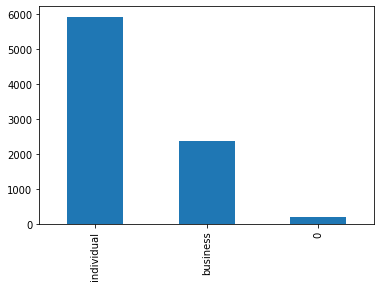

In [93]:
cust_info['Customer Type'].value_counts().sort_values(ascending=False).head(20).plot(kind = 'bar')

In [105]:
final_df = cust_info.drop('Customer ID', axis = 1)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8480 entries, 0 to 8479
Data columns (total 18 columns):
No of Invoices       8480 non-null int64
1. 0 - 30 days       8480 non-null float64
2. 31 - 60 days      8480 non-null float64
3. 61 - 90 days      8480 non-null float64
4. 91 - 180 days     8480 non-null float64
5. Above 180 days    8480 non-null float64
Closed               8480 non-null float64
Open                 8480 non-null float64
Overdue              8480 non-null float64
PartiallyPaid        8480 non-null float64
Total Amt            8480 non-null int64
Avg Amt              8480 non-null float64
Median Amt           8480 non-null int64
Total Bal Amt        8480 non-null int64
Avg Bal Amt          8480 non-null float64
Customer Type        8480 non-null object
Billing City         8480 non-null object
Shipping City        8480 non-null object
dtypes: float64(11), int64(4), object(3)
memory usage: 1.2+ MB


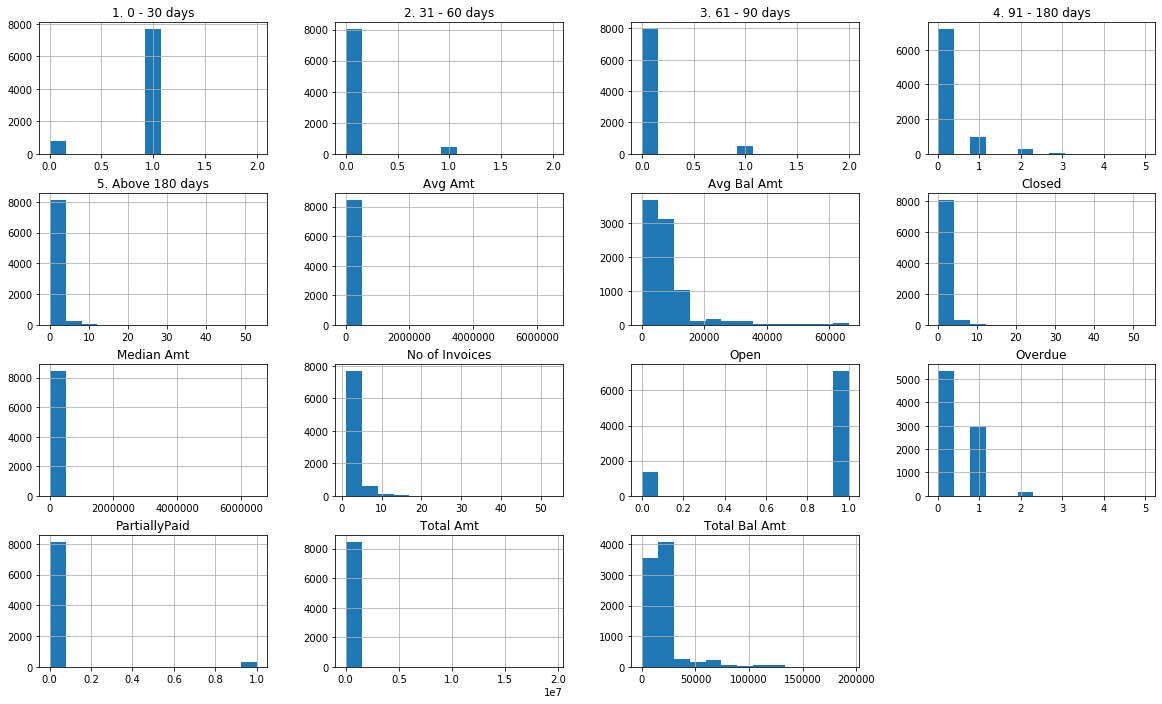

In [106]:
final_df.hist(bins=13, figsize=(20, 15), layout=(5, 4));

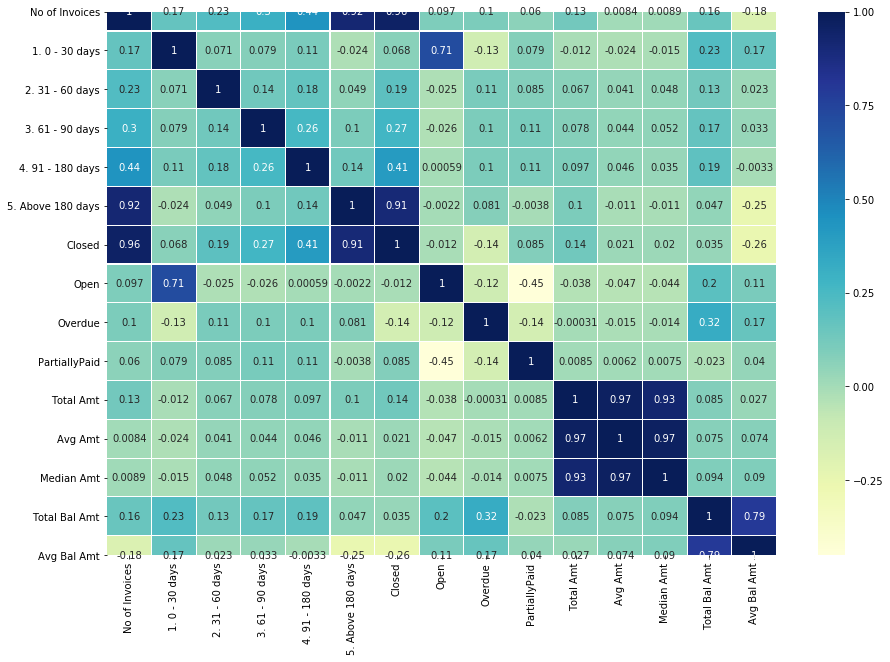

In [112]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(final_df.corr(), ax=ax, cmap ="YlGnBu", linewidths = 0.1, annot = True)
plt.show()


In [115]:
final_df.describe()

,No of Invoices,1. 0 - 30 days,2. 31 - 60 days,3. 61 - 90 days,4. 91 - 180 days,5. Above 180 days,Closed,Open,Overdue,PartiallyPaid,Total Amt,Avg Amt,Median Amt,Total Bal Amt,Avg Bal Amt
count,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8480.000000,8.480000e+03,8.480000e+03,8.480000e+03,8480.000000,8480.000000
mean,2.619929,0.910377,0.050354,0.059670,0.192571,1.406958,1.347877,0.840212,0.393396,0.038443,4.605656e+04,1.696128e+04,1.676790e+04,18677.151297,8294.257070
std,1.970176,0.290569,0.220299,0.238871,0.506420,1.712865,1.950858,0.366431,0.542305,0.192275,2.865719e+05,9.812598e+04,8.585501e+04,17722.218950,8475.527078
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.200000e+03,4.200000e+03,4.200000e+03,0.000000,0.000000
25%,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.650000e+04,8.250000e+03,8.250000e+03,9000.000000,4500.000000
50%,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.700000e+04,1.200000e+04,1.200000e+04,15000.000000,6666.666667
75%,3.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.500000e+04,1.500000e+04,1.500000e+04,22000.000000,8666.666667
max,53.000000,2.000000,2.000000,2.000000,5.000000,53.000000,53.000000,1.000000,5.000000,1.000000,1.950000e+07,6.500000e+06,6.500000e+06,193000.000000,66200.000000


In [116]:
X=final_df[['5. Above 180 days','Closed']]

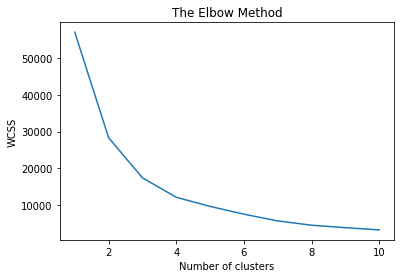

In [117]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [118]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
X = X.values

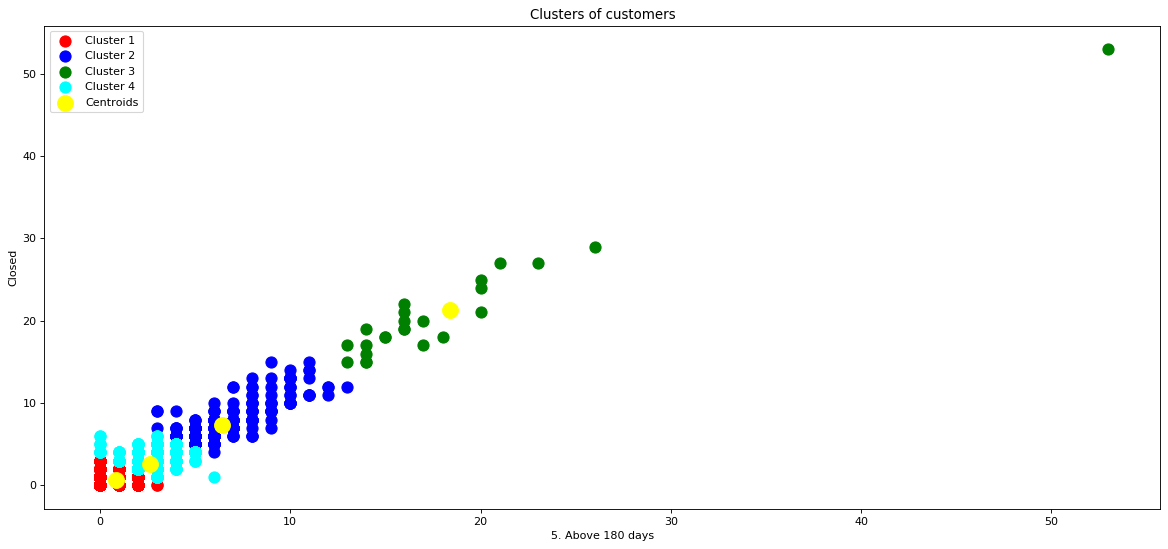

In [120]:
plt.figure(figsize=(18, 8), dpi=80)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('5. Above 180 days')
plt.ylabel('Closed')
plt.legend()
plt.show()